In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lmfit
import lmfit.models as models
from lmfit import Model

# Fitting using Gaussian model


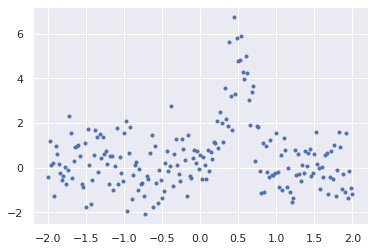

In [20]:
gausmodel = models.gaussian
x = np.linspace(-2,2,201)
a = 2   # amplitude
c = .5  # center
s = .15 # standard deviation (width)

sns.set_theme()
#data generation 
data = gausmodel(x,a,c,s) + np.random.randn(len(x))

plt.plot(x,data,'.')
plt.show()

In [21]:
# model fitting
gausfit = Model(gausmodel)
result = gausfit.fit(data,x=x)
# R2 fit
r2 = np.corrcoef(data,result.best_fit)[0,1]**2

# model statistics
result

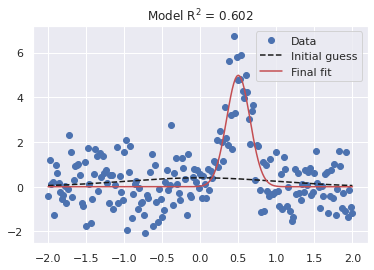

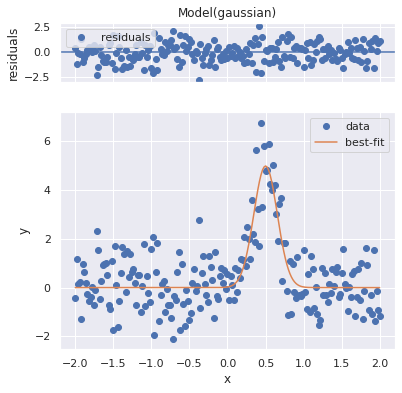

In [22]:
plt.plot(x,data,'o',label='Data')
plt.plot(x,result.init_fit,'k--', label='Initial guess')
plt.plot(x,result.best_fit,'r-', label='Final fit')
plt.legend()
plt.title('Model R$^2$ = %.3f'%r2)
plt.show()

print('\n\n\n\n')

result.plot(); #built-in


# Exponential decay

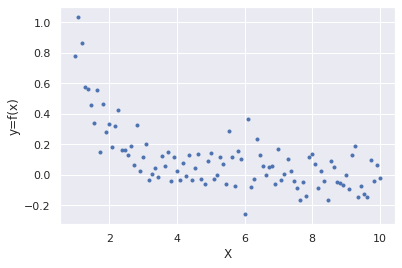

In [23]:
x = np.linspace(1,10,100)

#data generation
data = 1/x**2 + np.random.normal(loc=0,scale=np.sqrt(.01),size=len(x))

plt.plot(x,data,'.')
plt.xlabel('X')
plt.ylabel('y=f(x)')
plt.show()

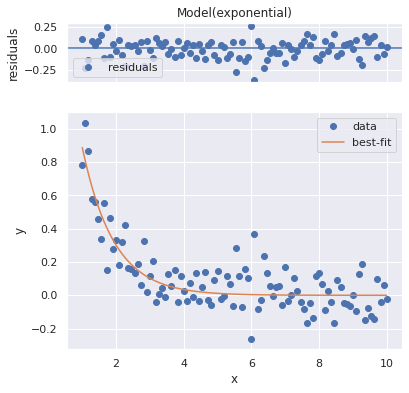

In [24]:
#model fitting 
expdecay_fit = Model(models.exponential)
result = expdecay_fit.fit(data,x=x)

result.plot();

# using own function (sigmoid)

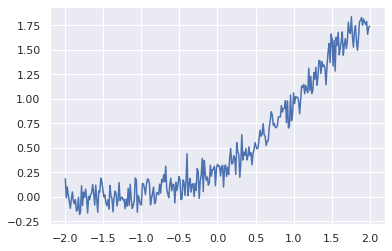

In [25]:
x = np.linspace(-2,2,301)
data = 2 / (1+np.exp(-2*(x-1))) + np.random.randn(len(x))/10

plt.plot(x,data);

In [26]:
def sigmoid(x,a=1,b=1,c=0):
  eterm = np.exp(-b*(x-c))
  return a / (1+eterm)

# model fitting
sigmodel = Model(sigmoid)
result = sigmodel.fit(data,x=x)

# R2 fit
r2 = np.corrcoef(data,result.best_fit)[0,1]**2

result

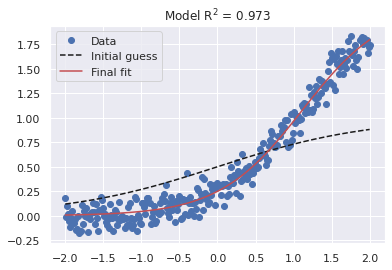

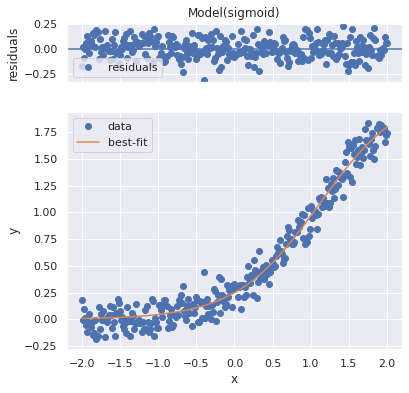

In [27]:
plt.plot(x,data,'o',label='Data')
plt.plot(x,result.init_fit,'k--', label='Initial guess')
plt.plot(x,result.best_fit,'r-', label='Final fit')
plt.legend()
plt.title('Model R$^2$ = %.3f'%r2)
plt.show()

print('\n\n\n\n')

# using built-in method
result.plot();

# Conjunctive model fitting

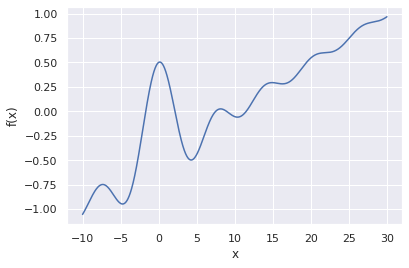

In [28]:
x = np.linspace(-10,30,1000)
data = np.sin(x)/x + np.linspace(-1,1,len(x))

plt.plot(x,data)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [29]:
conj_model = Model(models.gaussian) + Model(models.linear)
gauslin = conj_model.fit(data,x=x)

# R2 fit
r2 = np.corrcoef(data,gauslin.best_fit)[0,1]**2

gauslin #model stats

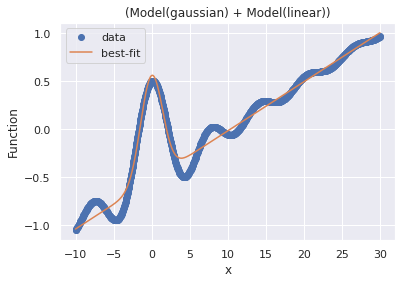

In [30]:
gauslin.plot_fit(ylabel='Function',xlabel='x',show_init=False);

# Multivariate model fitting

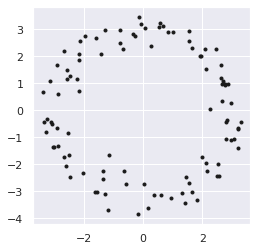

In [34]:
n = 100
th = np.linspace(0,2*np.pi,n)
r = 3

# x and y values are from cos and sine (with some noise)
x = r*np.cos(th) + np.random.normal(0,1/r,n) 
y = r*np.sin(th) + np.random.normal(0,1/r,n)

plt.plot(x,y,'k.')
plt.gca().set_aspect(1./plt.gca().get_data_ratio())
#plt.axis('off')
plt.show()

In [14]:
print( np.var( np.random.normal(0,1/r,n*10) ) )
print( 1/(r**2) )

0.11862753262099926
0.1111111111111111


In [35]:
# function to fit
def circlefit(th,r=1):
  x = r*np.cos(th)
  y = r*np.sin(th)
  return x,y


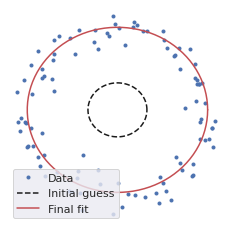

In [36]:
circ_model = Model(circlefit)
result = circ_model.fit((x,y),th=th)

plt.plot(x,y,'.',label='Data')
plt.plot(result.init_fit[0],result.init_fit[1],'k--', label='Initial guess')
plt.plot(result.best_fit[0],result.best_fit[1],'r-', label='Final fit')
plt.legend()
plt.gca().set_aspect(1./plt.gca().get_data_ratio())
plt.axis('off')
plt.show()